# Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2022-01-14'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


Text(0, 0.5, 'Price')

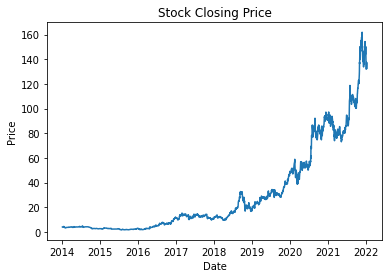

In [3]:
plt.plot(df['Adj Close'])
plt.title('Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')

In [4]:
df = df.reset_index()

In [5]:
df = df['Adj Close'].values
df = df.reshape(-1, 1)

In [6]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [8]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [9]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1569/1569 [==============================] - 4s 3ms/step - loss: 0.0124
Epoch 2/50
1569/1569 [==============================] - 3s 2ms/step - loss: 0.0031
Epoch 3/50
1569/1569 [==============================] - 3s 2ms/step - loss: 0.0023
Epoch 4/50
1569/1569 [==============================] - 3s 2ms/step - loss: 0.0021
Epoch 5/50
1569/1569 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 6/50
1569/1569 [==============================] - 3s 2ms/step - loss: 0.0018
Epoch 7/50
1569/1569 [==============================] - 3s 2ms/ste

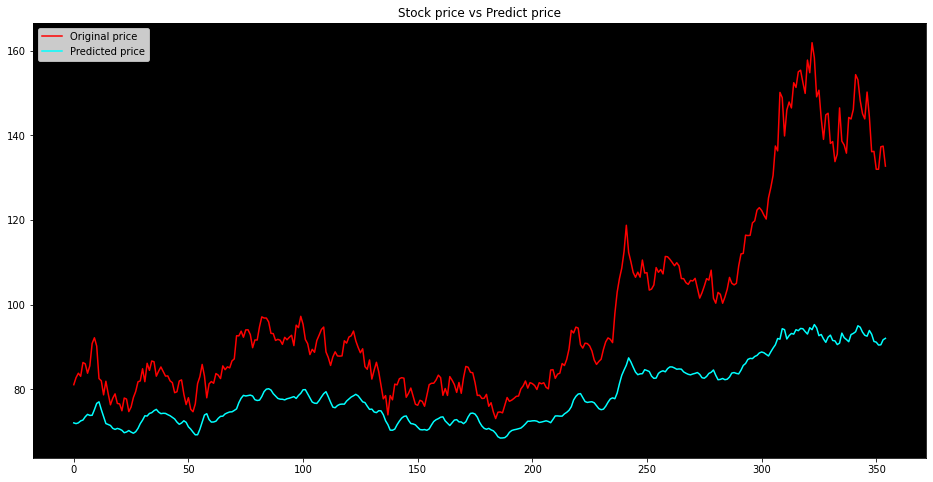

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('black')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.title('Stock price vs Predict price')
plt.legend()